## LOGISTIC REGRESSION CLASSIFICATION

In [1]:
# NEEDED when using JUPYTER NOTEBOOKS ONLINE (AZURE)
#!pip install mlxtend

import subprocess
import sys

reqs = subprocess.check_output([sys.executable, '-m', 'pip', 'freeze'])
installed_packages = [r.decode().split('==')[0] for r in reqs.split()]
#print(installed_packages)

if 'mlxtend' not in installed_packages:
    !pip install mlxtend                                              #- Adding mlxtend Package
    print('mlxtend installed successfully')

     |████████████████████████████████| 1.3MB 1.1MB/s eta 0:00:01
     |████████████████████████████████| 26.1MB 6.9kB/s eta 0:00:01    |███▏                            | 2.6MB 130kB/s eta 0:03:00     |█████████████████               | 13.9MB 469kB/s eta 0:00:26     |█████████████████████████████▊  | 24.2MB 2.0MB/s eta 0:00:01��██████████████████████████▌ | 24.8MB 144kB/s eta 0:00:09
     |████████████████████████████████| 10.0MB 38kB/s  eta 0:00:01    |███████████████████████▍        | 7.4MB 212kB/s eta 0:00:13
ERROR: scikit-image 0.16.2 has requirement matplotlib!=3.0.0,>=2.0.0, but you'll have matplotlib 3.0.0 which is incompatible.
ERROR: azureml-train-automl 1.0.72 has requirement onnxmltools==1.4.1, but you'll have onnxmltools 1.6.0 which is incompatible.
ERROR: azureml-train-automl 1.0.72 has requirement pandas<=0.23.4,>=0.21.0, but you'll have pandas 1.0.3 which is incompatible.
ERROR: azureml-train-automl 1.0.72 has requirement scipy<=1.1.0,>=1.0.0, but you'll have scipy 1.4.1

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
import numpy as np           # needed for "X_combined_std" & "y_combined"
from sklearn import datasets # importing datasets
import matplotlib.pyplot as plt # plotting purposes 
from mlxtend.plotting import plot_decision_regions # for plot_decision_regions "call" 
from sklearn.linear_model import LogisticRegression # importing specific method from library

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

sc = StandardScaler() #instance of StandardScaler object
sc.fit(X_train) # Using the fit method, StandardScaler estimated the parameters, 𝜇 (sample mean) and 𝜎 (standard deviation), 
                # for each feature dimension from the "training data". 
    
X_train_std = sc.transform(X_train) # once StandardScaler fitted, we proceed to apply/transform our training data 
                                    # and stored it on new variable.
X_test_std = sc.transform(X_test)   # and same process applied to "test data"

# vertical stack X_train_std over X_test_std
# creating back 
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train, y_test))

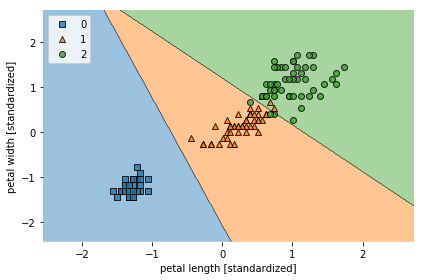

In [3]:
# initializing our model
# we set multi_class='ovr' for illustration purposes, Note that in recent versions of scikit-learn, 
# the technique used for multiclass classification, multinomial, or OvR, is chosen automatically.
lr = LogisticRegression(C=100.0, random_state=1,solver='lbfgs', multi_class='ovr')

# Book note: Note that there exist many different optimization algorithms for solving optimization problems. For 
# minimizing convex loss functions, such as the logistic regression loss, it is recommended to use more advanced 
# approaches than regular stochastic gradient descent (SGD). In fact, scikit-learn implements a whole range of such 
# optimization algorithms, which can be specified via the solver parameter, namely, 'newton-cg', 'lbfgs', 'liblinear', 
# 'sag', and 'saga'.
# Continuation below.....
# While the logistic regression loss is convex, most optimization algorithms should converge to the global loss 
# minimum with ease. However, there are certain advantages of using one algorithm over the other. For instance, in 
# the current version (v 0.21), scikit-learn uses 'liblinear' as a default, which cannot handle the multinomial 
# loss and is limited to the OvR scheme for multi-class classification. However, in future versions of scikit-learn 
# (that is, v 0.22), the default solver will be changed to 'lbfgs', which stands for the limited-memory 
# Broyden–Fletcher–Goldfarb–Shanno (BFGS) algorithm (https://en.wikipedia.org/wiki/Limited-memory_BFGS) and is more 
# flexible in this regard. To adopt this new default choice, we will specify solver='lbfgs' explicitly when using logistic 
# regression throughout this book.

# feeding our logistic regression model with "training data"
lr.fit(X_train_std, y_train)

# plotting all our data
plot_decision_regions(X_combined_std,y_combined,clf=lr)

# plotting results
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [4]:
lr.predict(X_test_std[:3, :]) # first 3 records on dataset
# meaning: 1st record will be type 2
         # 2nd record will be type 0
         # 3rd record will be type 0

array([2, 0, 0])

In [5]:
# Lastly, a word of caution if you want to predict the class label of a single flower example: scikit-learn 
# expects a two-dimensional array as data input; thus, we have to convert a single row slice into such a 
# format first. One way to convert a single row entry into a two-dimensional data array is to use NumPy's 
# reshape method to add a new dimension, as demonstrated here:

lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

In [ ]:
single_manual_input=np.array([-2, -1])

lr.predict(single_manual_input.reshape(1, -1))

# keep in mind regression is taking standarized values, if regular values to be used then first need to do something like this:
# X_test_std = sc.transform(X_test) being X_test our actual values